In [22]:
import pandas as pd


movie_df = pd.read_csv("movies_data_processed.csv")
print(movie_df.info())
movie_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4996 non-null   object 
 1   genres        4996 non-null   object 
 2   type          4996 non-null   object 
 3   rating        4863 non-null   float64
 4   no_of_votes   4863 non-null   float64
 5   meta_score    2143 non-null   float64
 6   release_date  4946 non-null   float64
 7   gross         2084 non-null   float64
 8   budget        1805 non-null   float64
 9   countries     4969 non-null   object 
 10  url           4996 non-null   object 
 11  ROI           1612 non-null   float64
 12  result        4996 non-null   object 
dtypes: float64(7), object(6)
memory usage: 507.5+ KB
None


,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.042498,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.417608,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [2]:
movie_df.describe()

,rating,no_of_votes,meta_score,release_date,gross,budget,ROI
count,7750.000000,7.750000e+03,3646.000000,7936.000000,3.533000e+03,3.107000e+03,2854.000000
mean,7.158168,1.619526e+05,65.626440,2006.869834,2.032361e+08,5.872758e+07,4.677386
std,1.109296,2.974186e+05,16.171655,20.188321,3.292970e+08,6.531551e+07,12.806288
min,1.500000,6.000000e+00,10.000000,1915.000000,1.900000e+01,1.000000e+04,-0.999983
25%,6.600000,4.525000e+03,54.000000,2000.000000,1.345060e+07,1.200000e+07,0.323698
50%,7.300000,4.400000e+04,66.000000,2014.000000,6.644330e+07,3.200000e+07,2.013630
75%,7.900000,1.807500e+05,78.000000,2022.000000,2.457246e+08,9.000000e+07,4.700007
max,9.600000,3.000000e+06,100.000000,2027.000000,2.923711e+09,4.149000e+08,316.627031


In [3]:
filtered_movies = movie_df[(movie_df["release_date"] >= 2010) & (movie_df["release_date"] <= 2024)].dropna(subset=["genres"])

In [4]:
from collections import Counter
import pandas as pd


list_genres = []
for genres in filtered_movies['genres'].dropna():
    list_genres.extend(genres.split(', '))

genres_count = Counter(list_genres)
len(genres_count)

201

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


genres_df = pd.DataFrame(genres_count.items(), columns=["Genre", "Count"])
top_10_genres_df = genres_df.sort_values(by="Count", ascending=False)[:10]
top_10_genres_df

,Genre,Count
9,Drama,2081
16,Comedy,1200
6,Action,1200
7,Adventure,1184
14,Thriller,956
17,Fantasy,779
12,Crime,734
13,Mystery,673
8,Animation,665
19,Sci-Fi,663


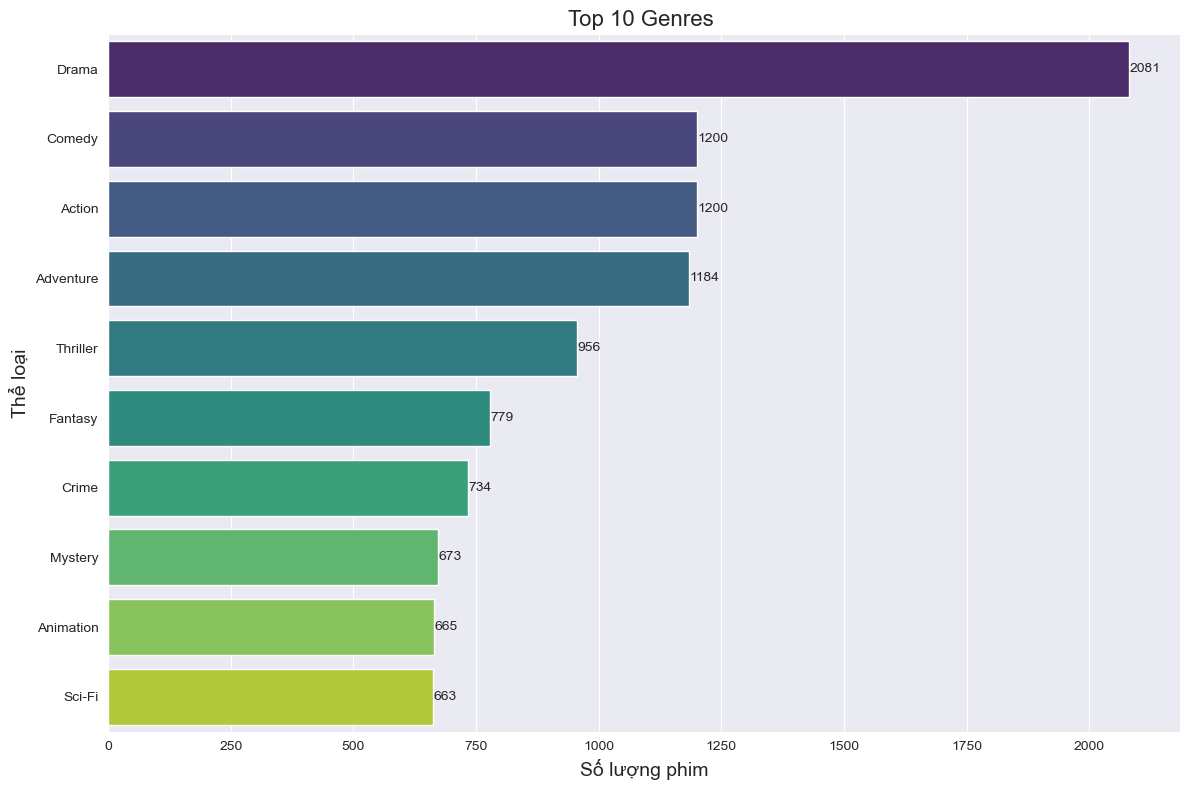

In [6]:
plt.figure(figsize=(12, 8))  # tăng kích thước để tránh chồng lấn

sns.barplot(
    data=top_10_genres_df,
    x="Count",
    y="Genre",
    palette="viridis",
    legend=False,
    hue = "Genre"
)

plt.title("Top 10 Genres ", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=14) 
plt.ylabel("Thể loại", fontsize=14)

# Thêm nhãn số lượng lên trên các cột
for idx, (genre, count) in enumerate(zip(top_10_genres_df["Genre"], top_10_genres_df["Count"])):
    plt.text(count + 1, idx, count, va='center')

plt.tight_layout()
plt.show()

In [7]:

genres_per_year = [
    (row["release_date"], genre, row["rating"], row["no_of_votes"], row["meta_score"], row["result"])
    for _, row in filtered_movies.iterrows()
    for genre in row["genres"].split(", ")
]

genres_per_year_df = pd.DataFrame(genres_per_year, columns=["Year", "Genre", "rating", "no_of_votes", "meta_score", "result"])
genres_per_year_df
    

,Year,Genre,rating,no_of_votes,meta_score,result
0,2013.0,Action Epic,9.1,591000.0,NaN,Success
1,2013.0,Adult Animation,9.1,591000.0,NaN,Success
2,2013.0,Anime,9.1,591000.0,NaN,Success
3,2013.0,Shōnen,9.1,591000.0,NaN,Success
4,2013.0,Survival,9.1,591000.0,NaN,Success
...,...,...,...,...,...,...
23257,2024.0,Adventure,6.3,2500.0,NaN,Fail
23258,2024.0,History,6.3,2500.0,NaN,Fail
23259,2024.0,Western,6.3,2500.0,NaN,Fail
23260,2016.0,Drama,5.8,12000.0,42.0,Fail


In [8]:
# Tính toán các chỉ số theo Year và Genre
agg_df = genres_per_year_df.groupby(["Year", "Genre"]).agg(
    count=('Genre', 'size'),
    avg_rating=('rating', 'mean'),
    avg_no_of_votes=('no_of_votes', 'mean'),
    avg_meta_score=('meta_score', 'mean'),
    success_count=('result', lambda x: (x == 'Success').sum())
).reset_index()

# Thêm tỷ lệ success/tổng phim
agg_df['success_rate'] = agg_df['success_count'] / agg_df['count']

agg_df.head()

,Year,Genre,count,avg_rating,avg_no_of_votes,avg_meta_score,success_count,success_rate
0,2010.0,Action,53,7.866038,4.238302e+05,66.590909,47,0.886792
1,2010.0,Action Epic,5,8.360000,2.218000e+06,69.800000,5,1.000000
2,2010.0,Adult Animation,14,8.471429,8.628571e+04,NaN,14,1.000000
3,2010.0,Adventure,56,7.794643,4.798625e+05,67.533333,54,0.964286
4,2010.0,Adventure Epic,4,8.800000,2.700000e+06,74.000000,4,1.000000


In [9]:
filtered_agg_df = agg_df[agg_df['Genre'].isin(top_10_genres_df["Genre"].to_list())]
filtered_agg_df

,Year,Genre,count,avg_rating,avg_no_of_votes,avg_meta_score,success_count,success_rate
0,2010.0,Action,53,7.866038,423830.188679,66.590909,47,0.886792
3,2010.0,Adventure,56,7.794643,479862.500000,67.533333,54,0.964286
6,2010.0,Animation,40,7.802500,300777.500000,69.700000,39,0.975000
14,2010.0,Comedy,54,7.479630,161086.037037,65.863636,46,0.851852
20,2010.0,Crime,27,8.055556,294144.444444,75.428571,26,0.962963
...,...,...,...,...,...,...,...,...
1734,2024.0,Drama,318,6.968868,66739.654088,66.170103,214,0.672956
1742,2024.0,Fantasy,127,6.712598,54501.220472,51.159420,90,0.708661
1777,2024.0,Mystery,94,6.753191,60408.265957,60.404255,70,0.744681
1797,2024.0,Sci-Fi,124,6.876613,122202.266129,57.857143,94,0.758065


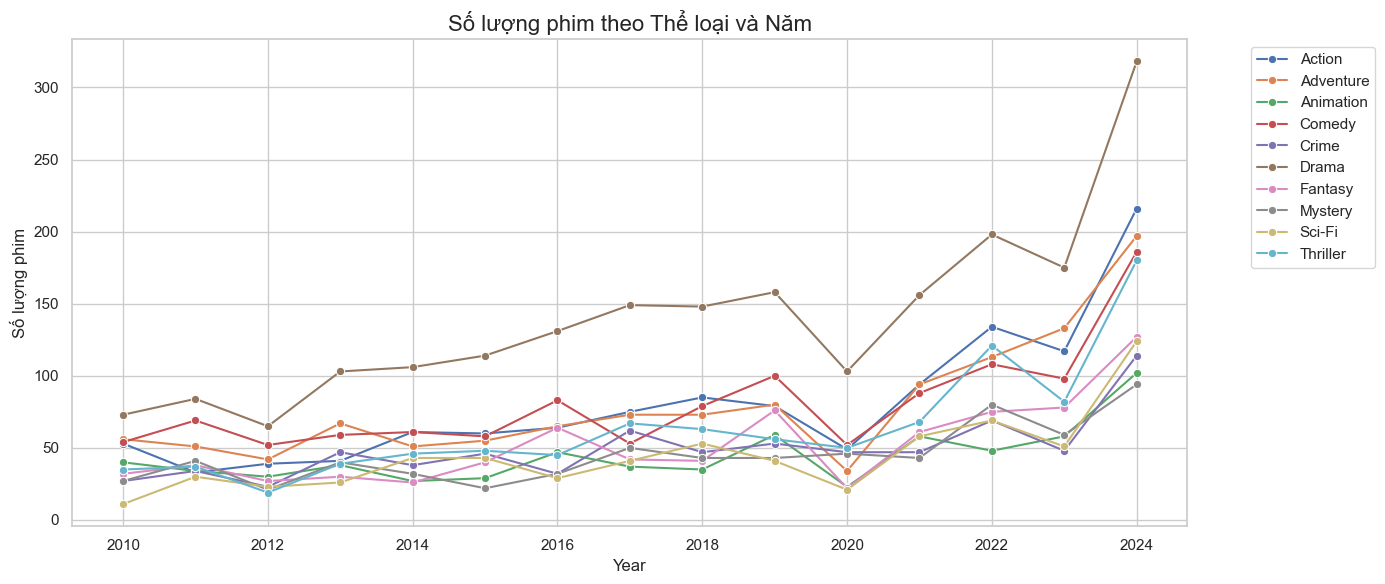

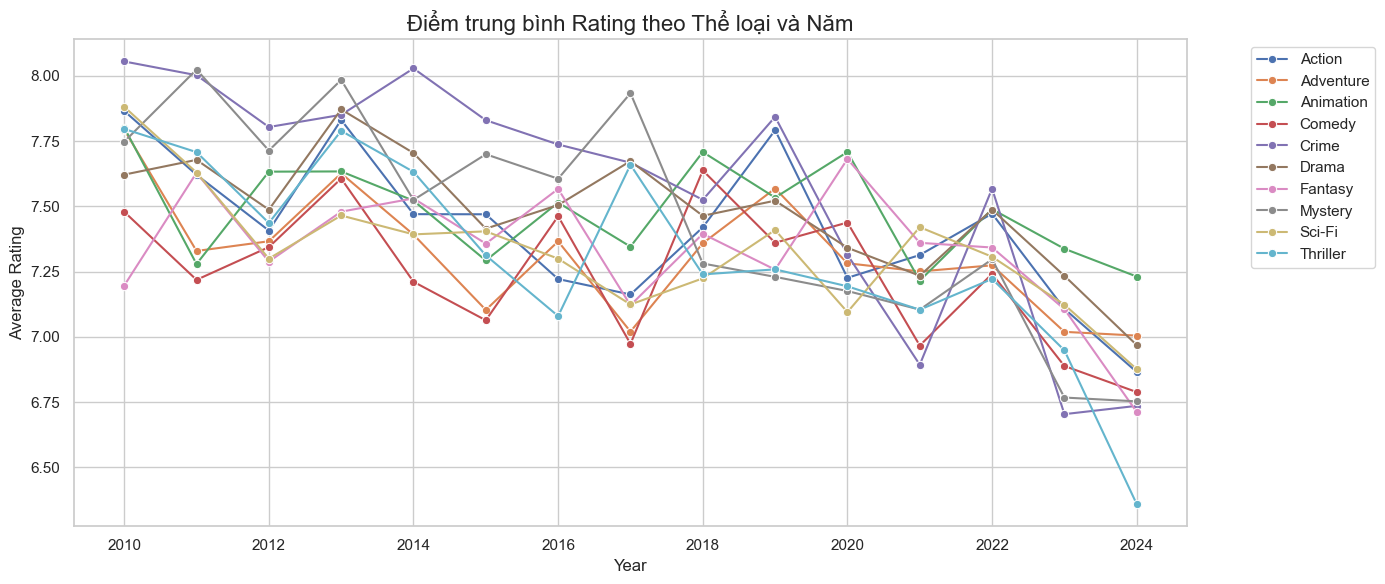

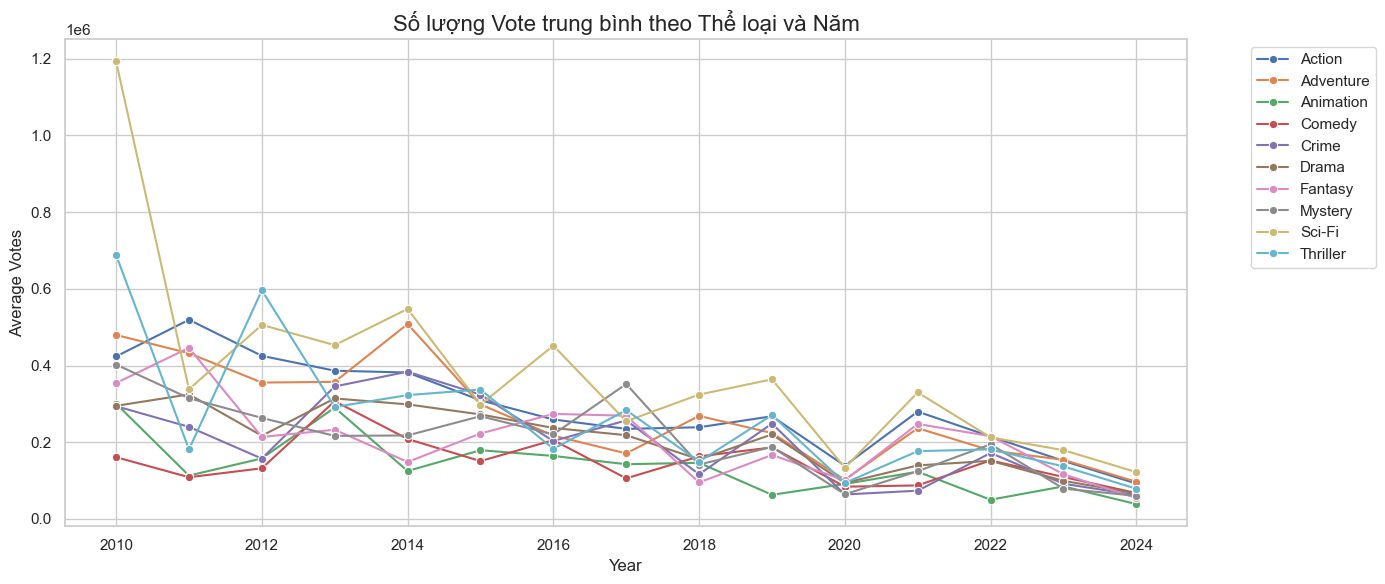

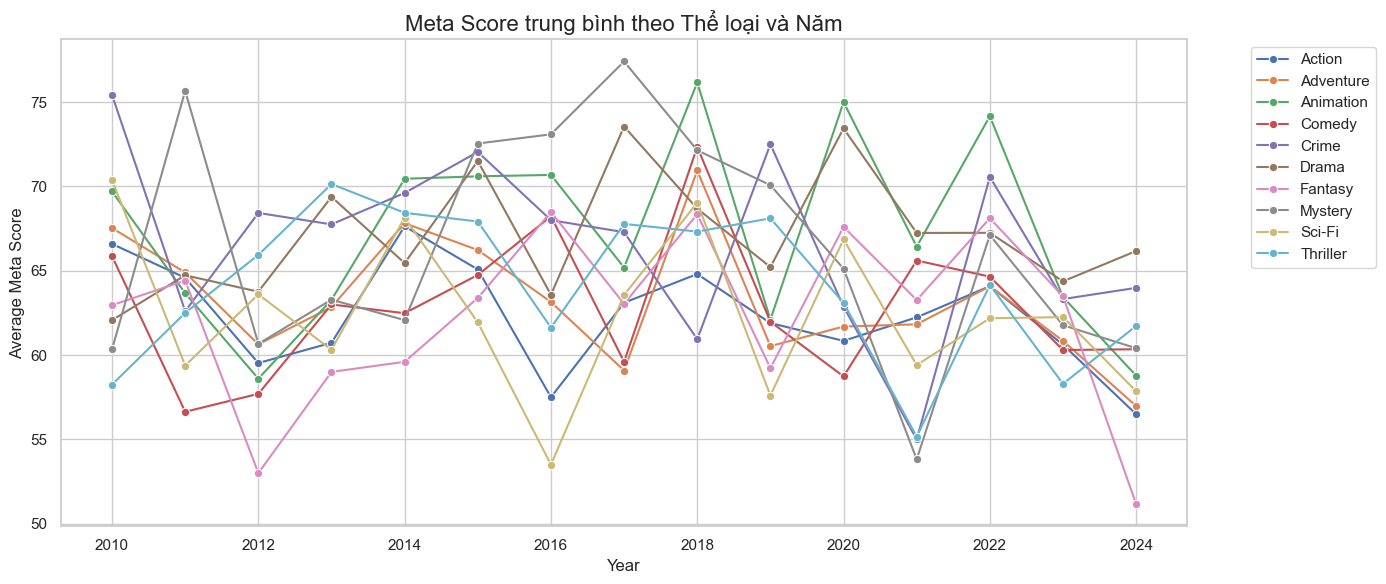

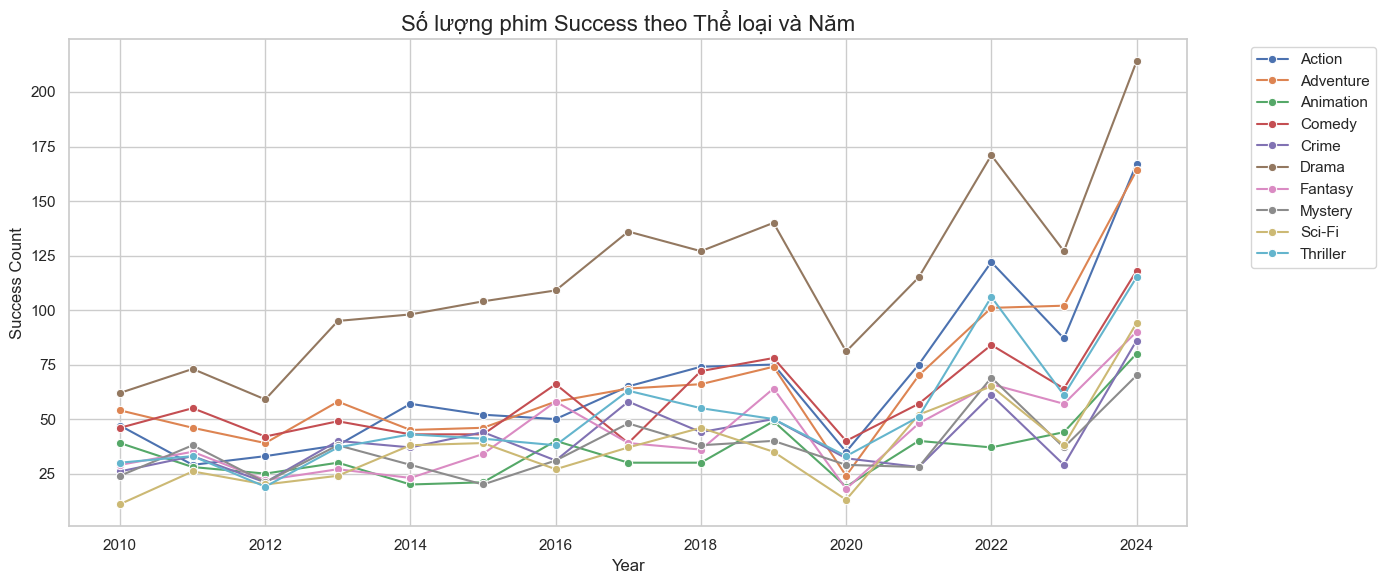

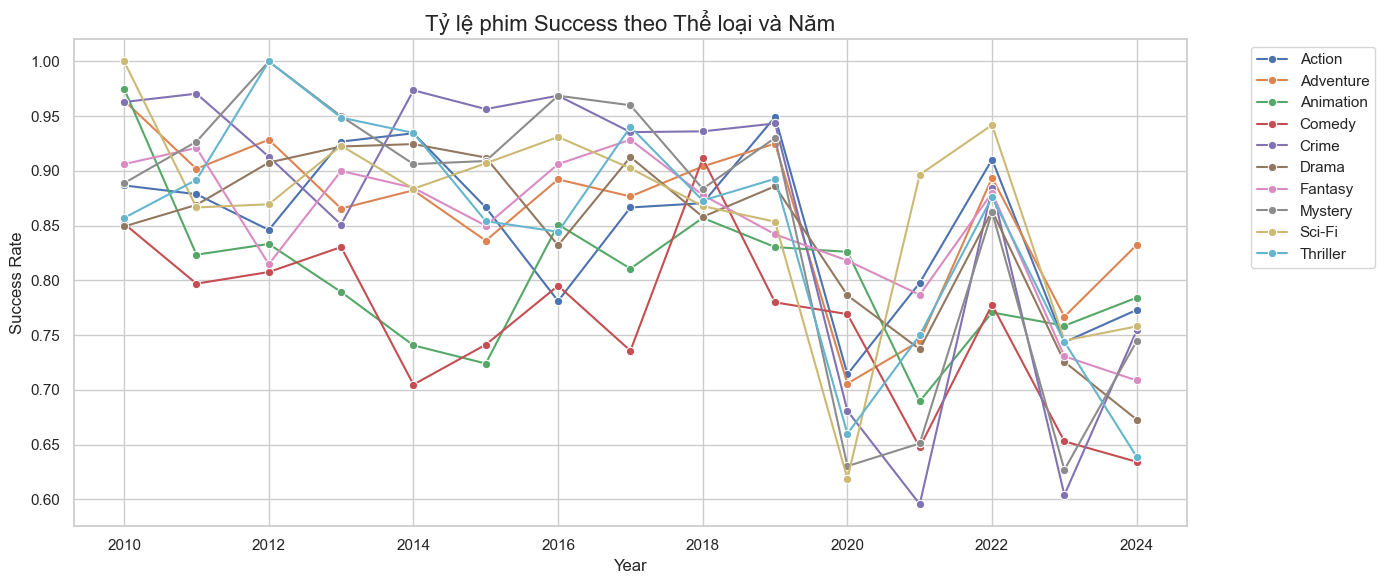

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho đẹp
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

def plot_line(df, y_col, title, ylabel):
    plt.figure()
    sns.lineplot(data=df, x='Year', y=y_col, hue='Genre', marker='o')
    plt.title(title, fontsize=16)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Đẩy legend ra ngoài
    plt.tight_layout()
    plt.show()

# 1. Số lượng phim
plot_line(filtered_agg_df, 'count', 'Số lượng phim theo Thể loại và Năm', 'Số lượng phim')

# 2. Trung bình rating
plot_line(filtered_agg_df, 'avg_rating', 'Điểm trung bình Rating theo Thể loại và Năm', 'Average Rating')

# 3. Trung bình số lượng vote
plot_line(filtered_agg_df, 'avg_no_of_votes', 'Số lượng Vote trung bình theo Thể loại và Năm', 'Average Votes')

# 4. Trung bình meta_score
plot_line(filtered_agg_df, 'avg_meta_score', 'Meta Score trung bình theo Thể loại và Năm', 'Average Meta Score')

# 5. Số lượng Success
plot_line(filtered_agg_df, 'success_count', 'Số lượng phim Success theo Thể loại và Năm', 'Success Count')

# 6. Tỷ lệ Success
plot_line(filtered_agg_df, 'success_rate', 'Tỷ lệ phim Success theo Thể loại và Năm', 'Success Rate')


<Figure size 1400x800 with 0 Axes>

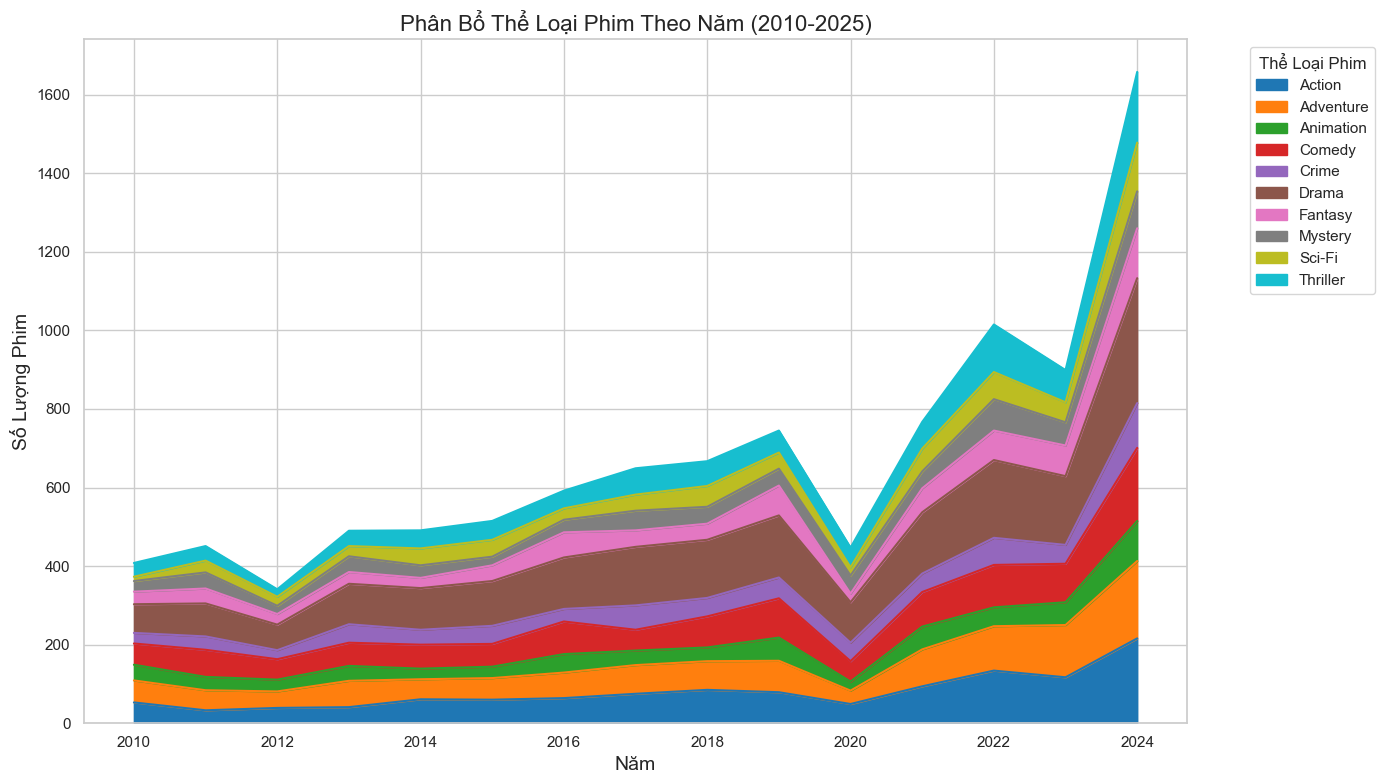

<Figure size 1400x800 with 0 Axes>

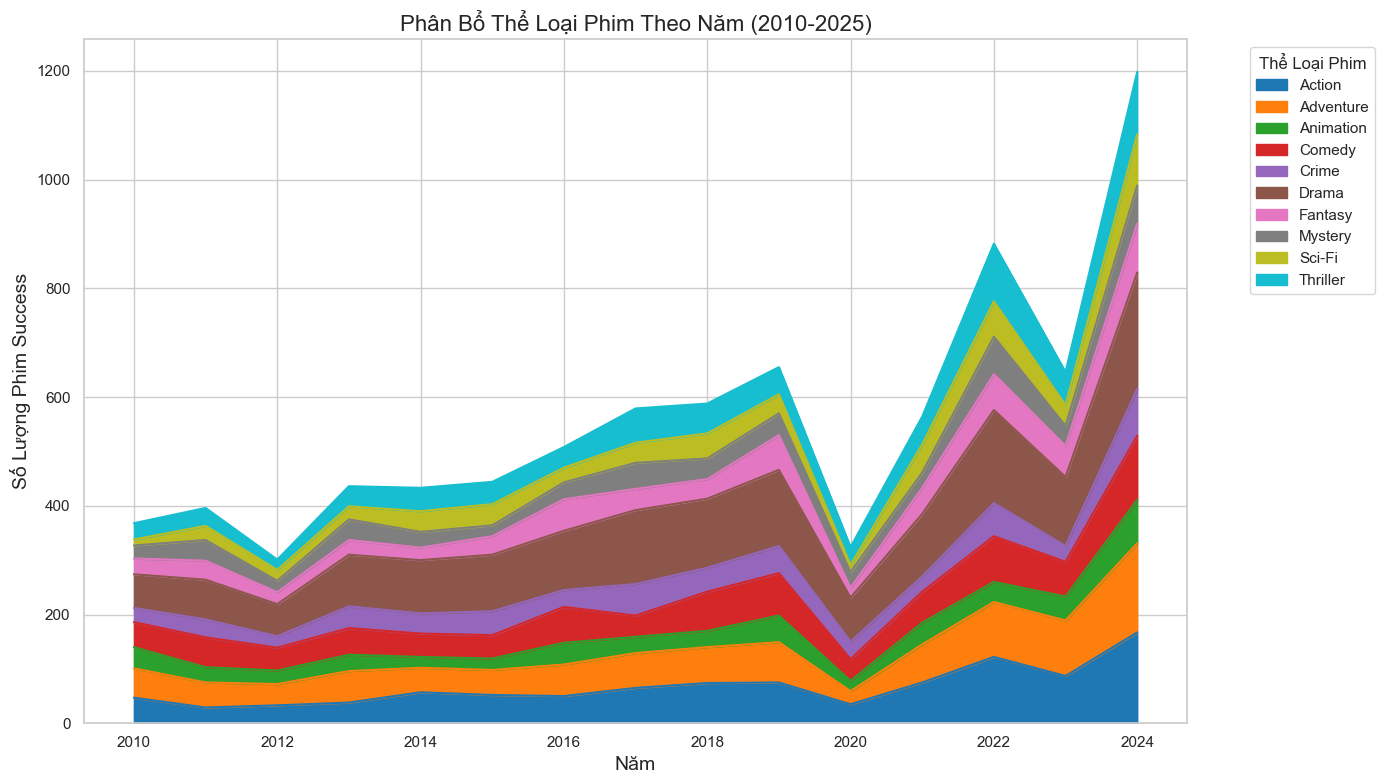

In [11]:
def plot_stacked_area_chart(df, index, column, values, title, xlabel, ylabel):
    plt.figure(figsize=(14, 8))
    
    # Pivot data để tạo stacked area chart
    pivot_df = df.pivot(index=index, columns=column, values=values).fillna(0)
    
    # Stacked Area Chart
    pivot_df.plot.area(stacked=True, figsize=(14, 8), cmap='tab10')
    
    plt.title("Phân Bổ Thể Loại Phim Theo Năm (2010-2025)", fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title=title, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_stacked_area_chart(filtered_agg_df, 'Year', 'Genre', 'count', 'Thể Loại Phim', 'Năm', 'Số Lượng Phim')
plot_stacked_area_chart(filtered_agg_df, 'Year', 'Genre', 'success_count', 'Thể Loại Phim', 'Năm', 'Số Lượng Phim Success')


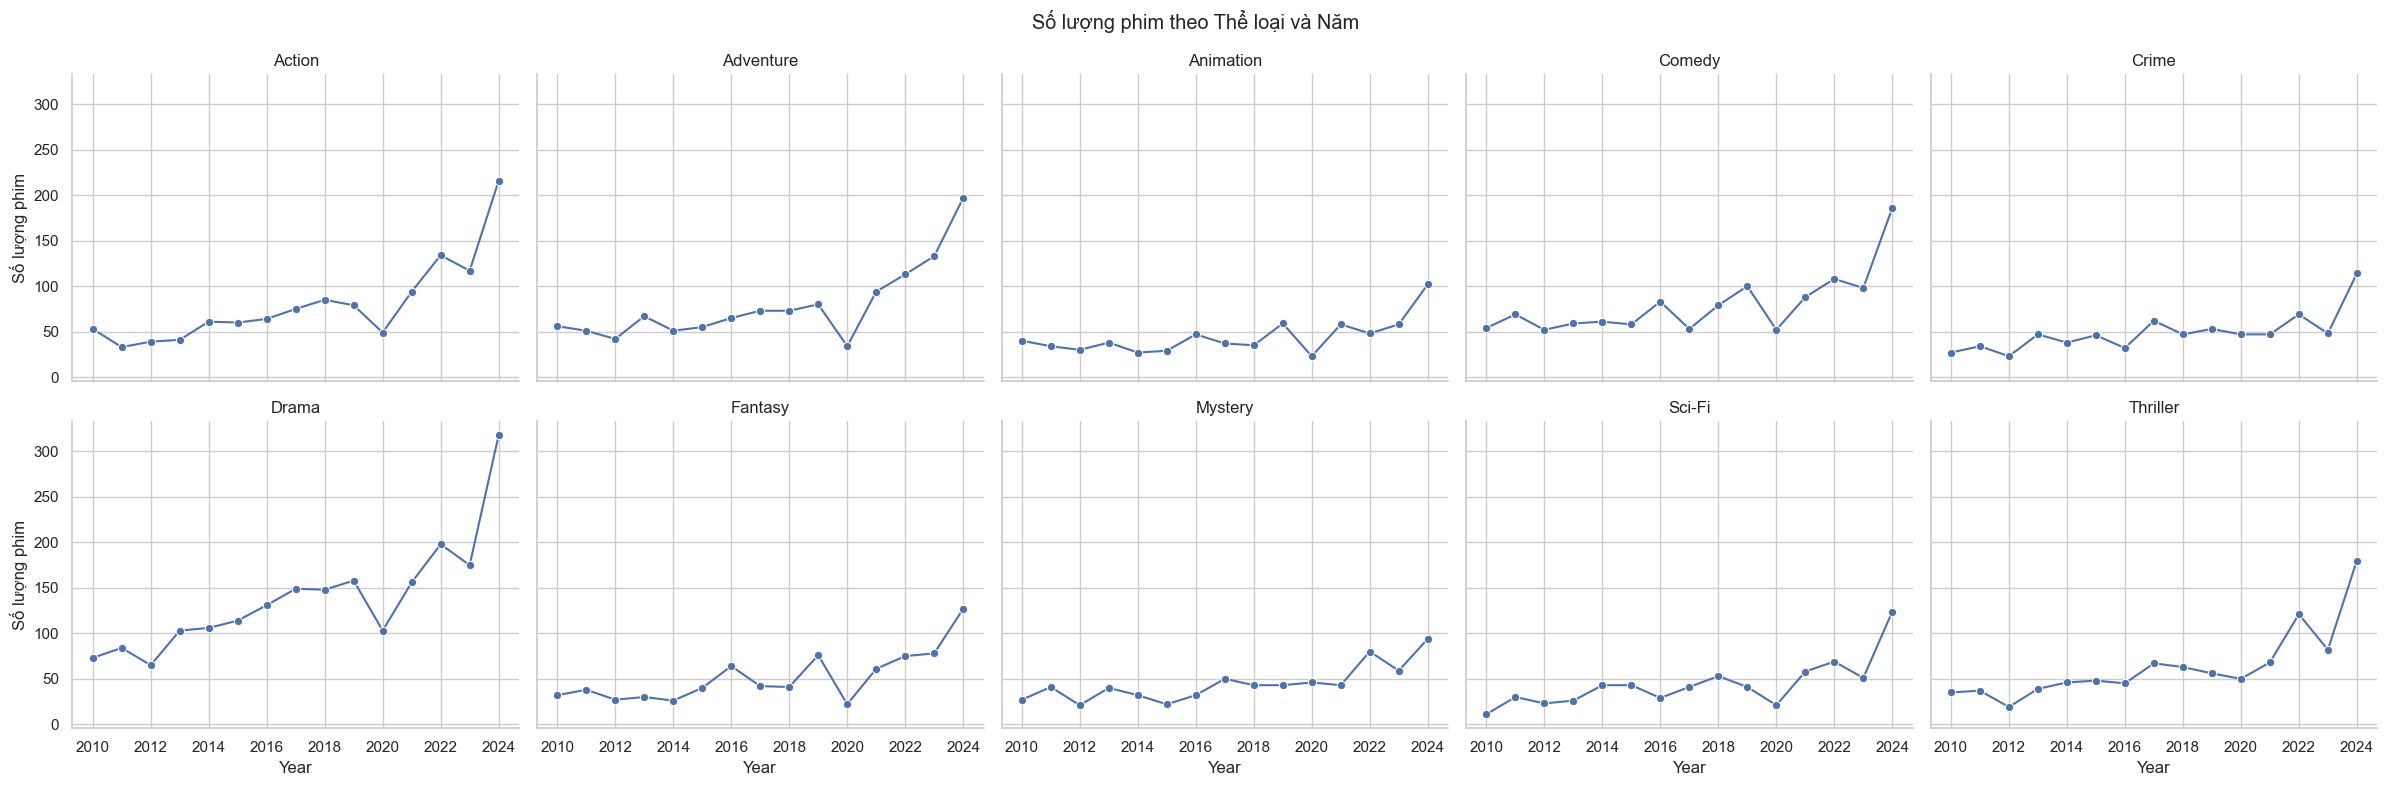

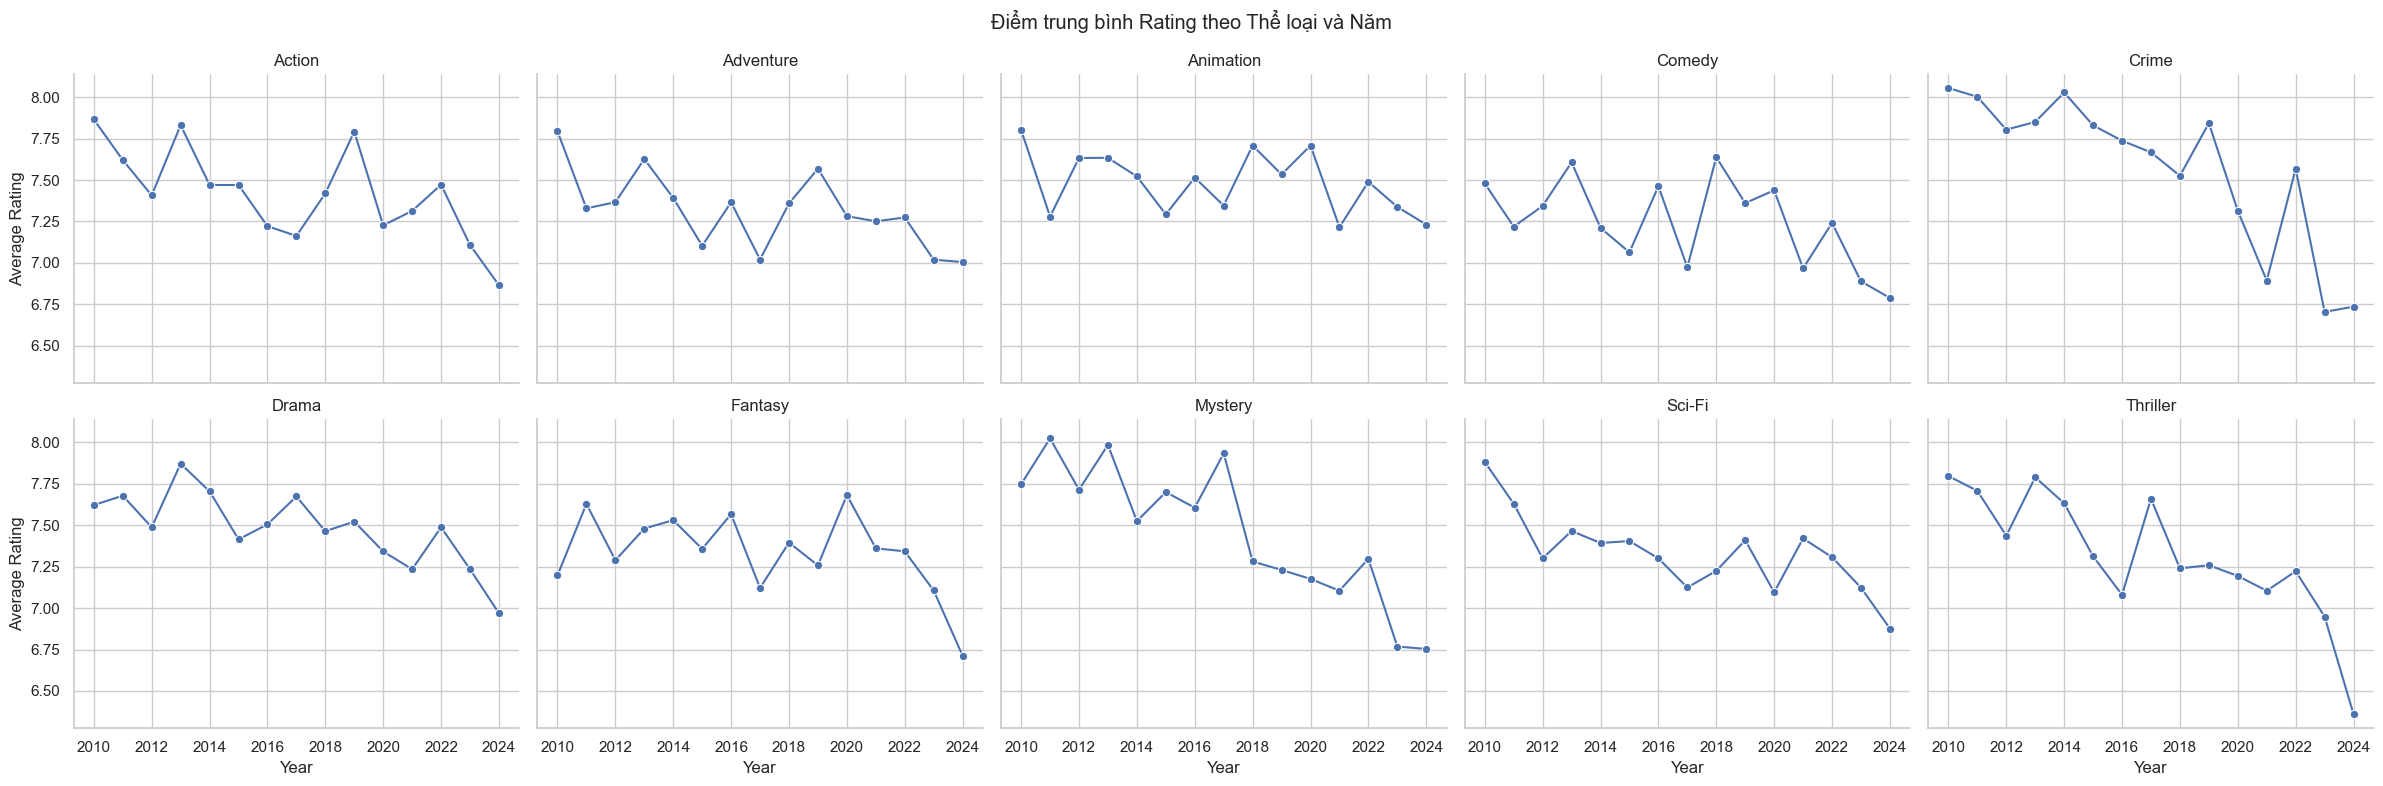

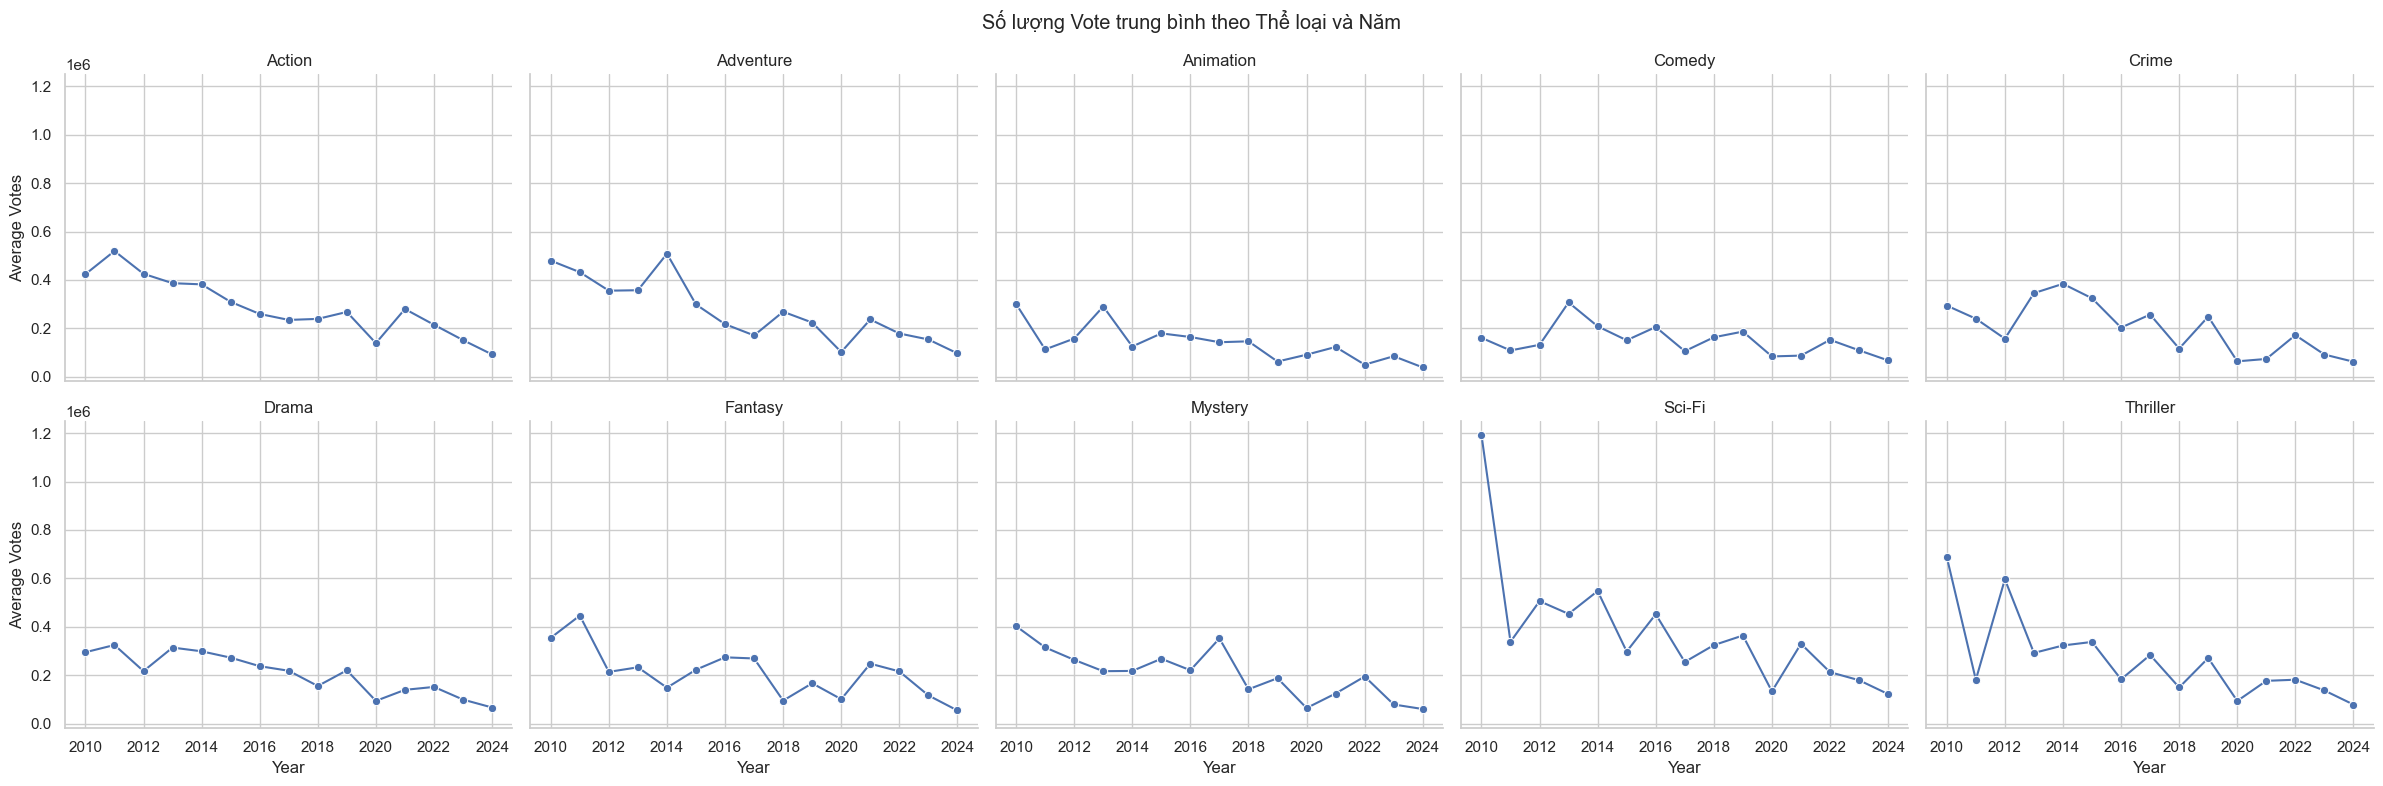

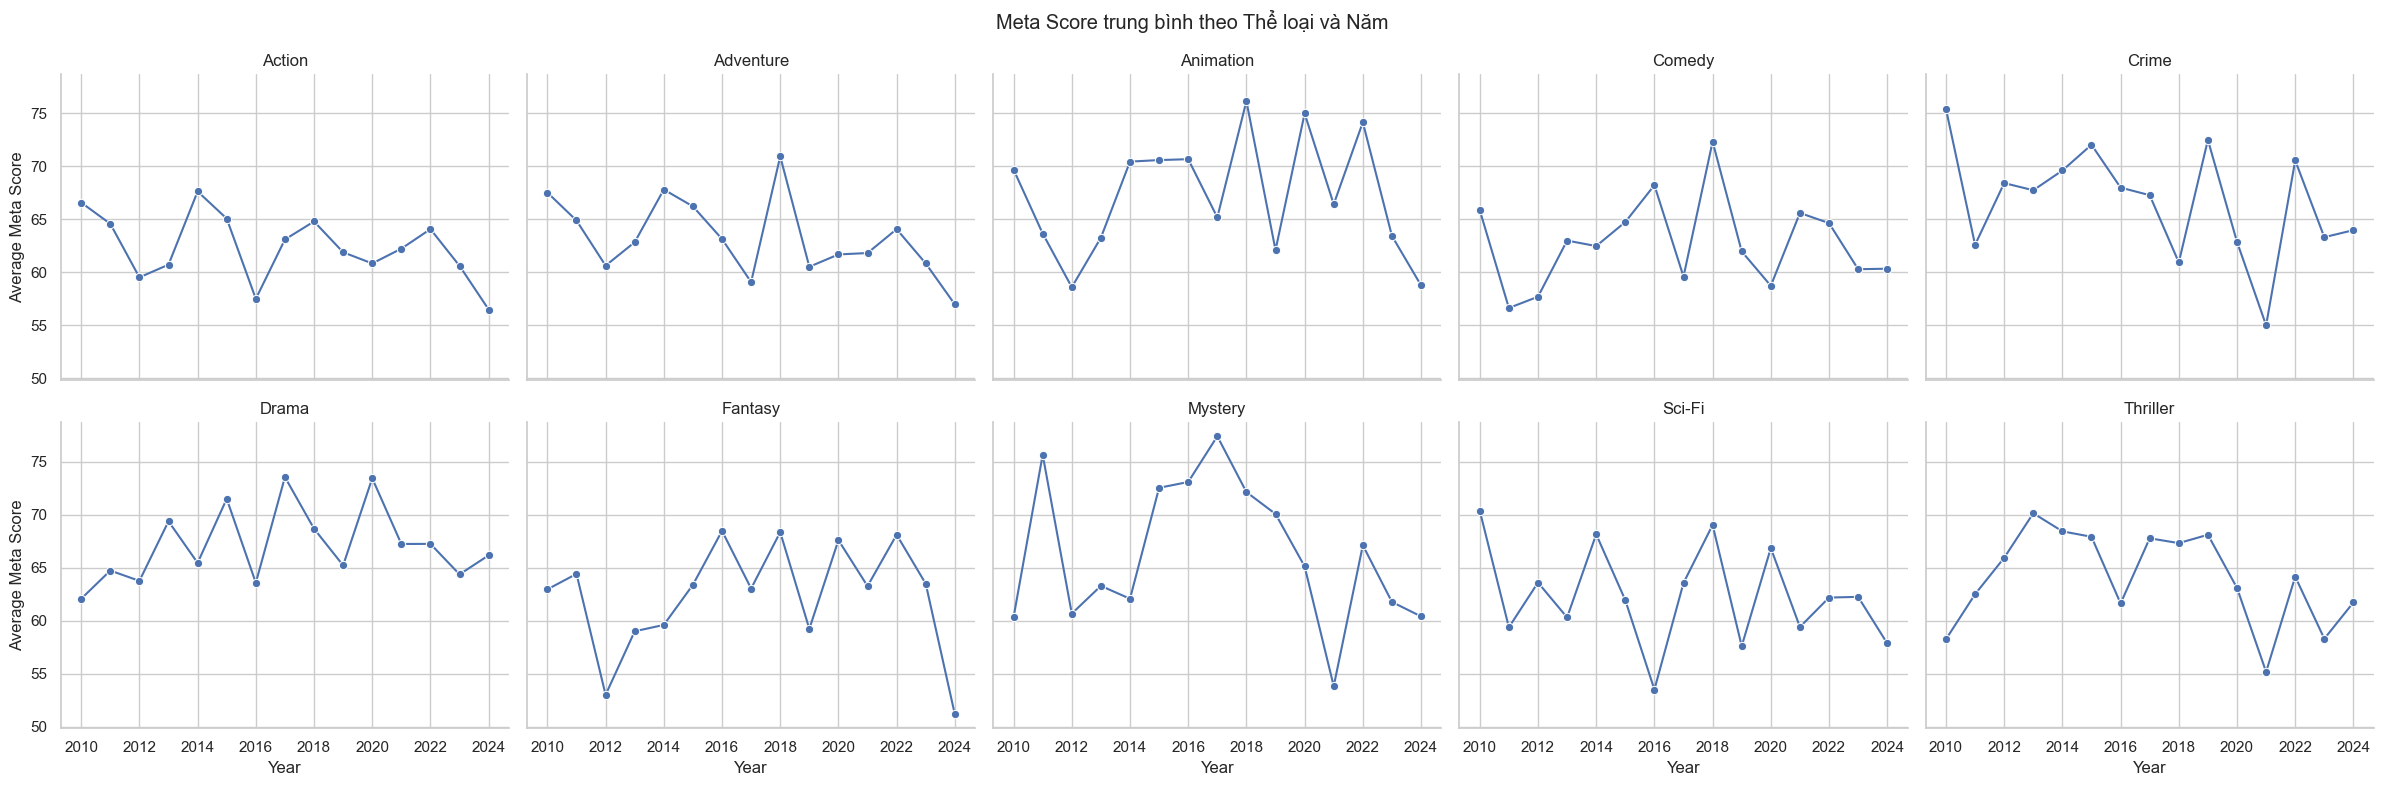

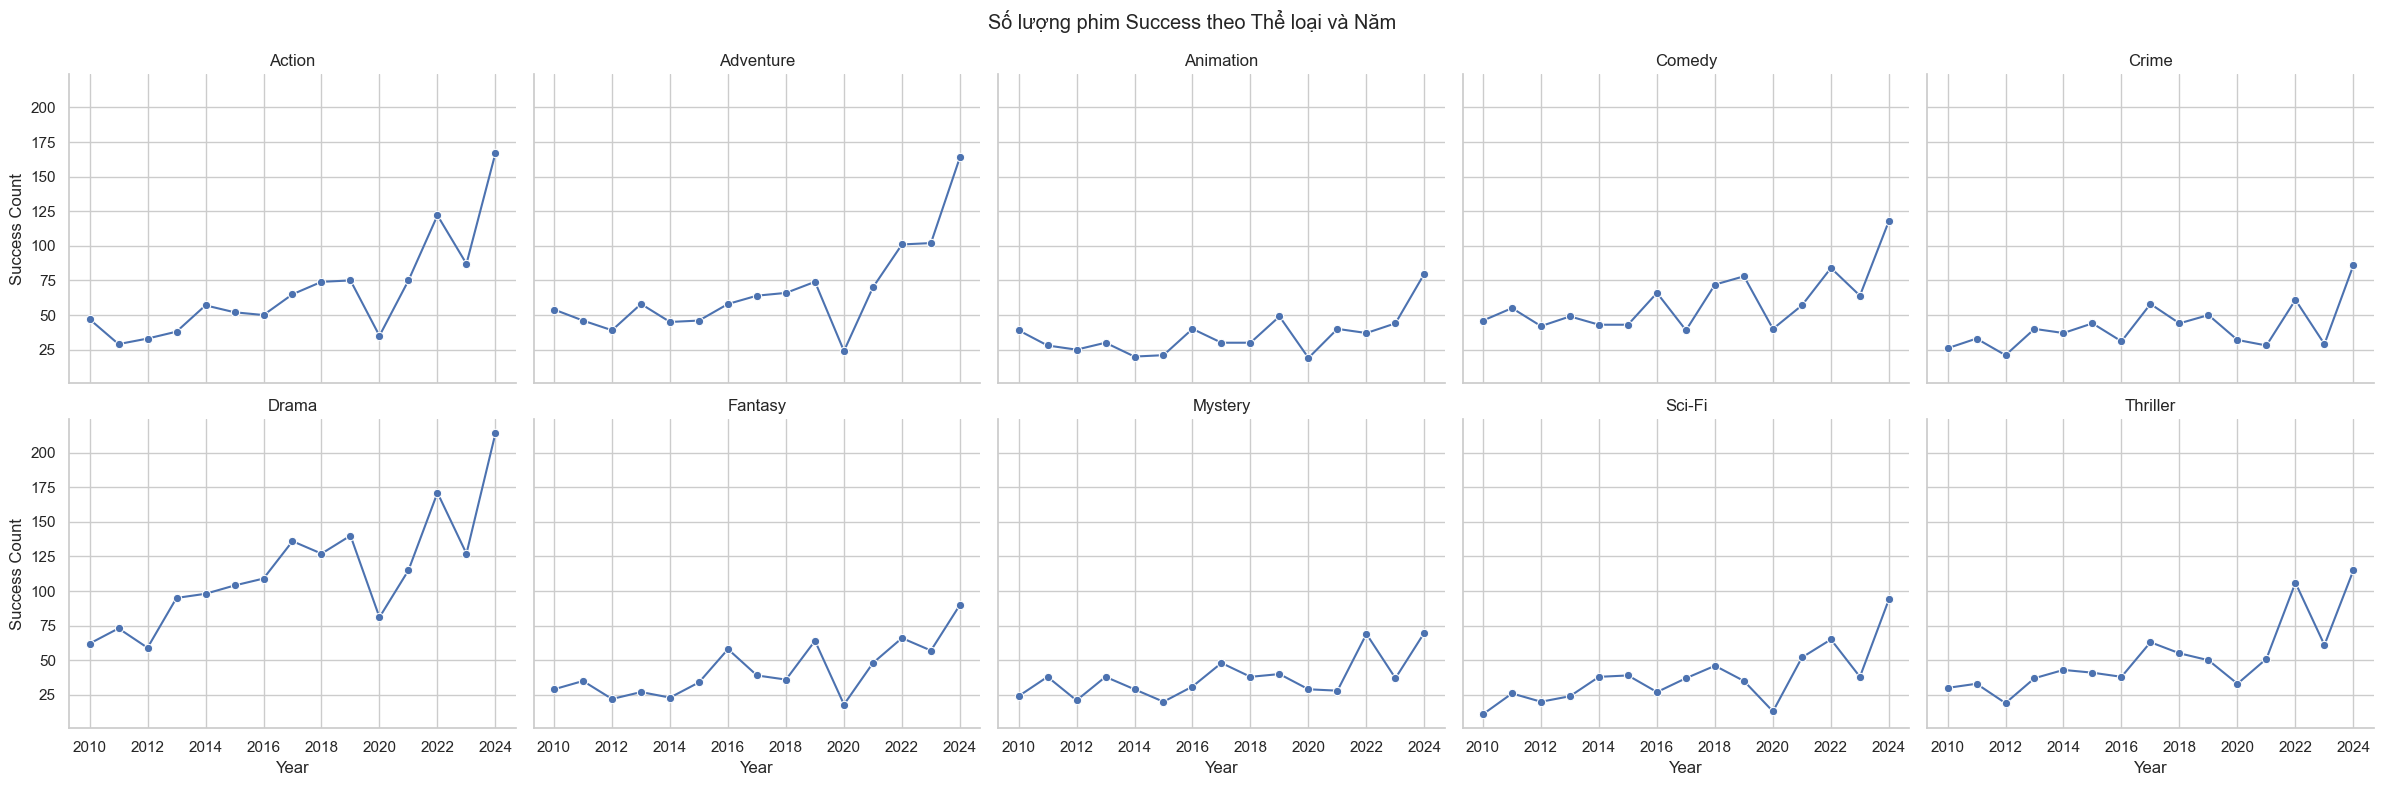

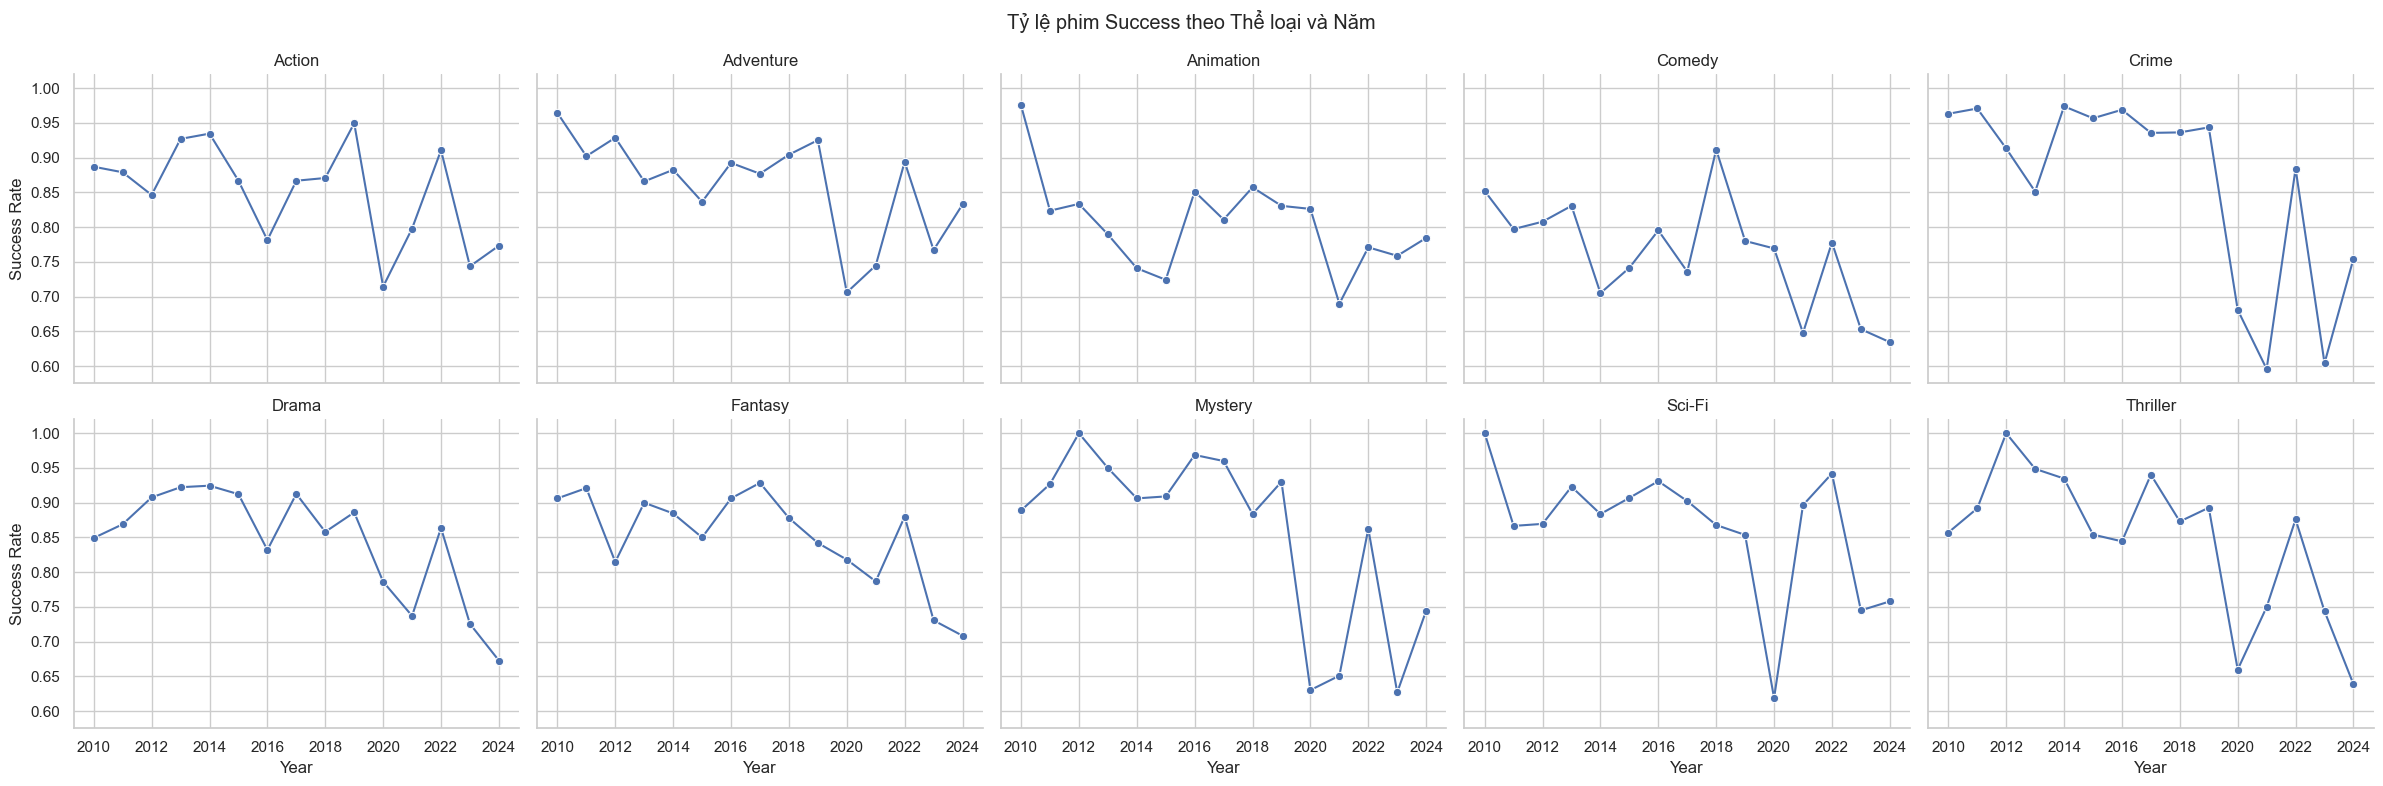

In [12]:
def plot_facet_line_chart(df, x_col, y_col, title, hue, xlabel, ylabel):
    g = sns.FacetGrid(df, col=hue, col_wrap=5, height=4, aspect=1.2)
    g.map_dataframe(sns.lineplot, x=x_col, y=y_col, marker='o')
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(xlabel, ylabel)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title)
    plt.show()

plot_facet_line_chart(filtered_agg_df, 'Year', 'count', 'Số lượng phim theo Thể loại và Năm', 'Genre', 'Year', 'Số lượng phim')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_rating', 'Điểm trung bình Rating theo Thể loại và Năm', 'Genre', 'Year', 'Average Rating')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_no_of_votes', 'Số lượng Vote trung bình theo Thể loại và Năm', 'Genre', 'Year', 'Average Votes')
plot_facet_line_chart(filtered_agg_df, 'Year', 'avg_meta_score', 'Meta Score trung bình theo Thể loại và Năm', 'Genre', 'Year', 'Average Meta Score')
plot_facet_line_chart(filtered_agg_df, 'Year', 'success_count', 'Số lượng phim Success theo Thể loại và Năm', 'Genre', 'Year', 'Success Count')
plot_facet_line_chart(filtered_agg_df, 'Year', 'success_rate', 'Tỷ lệ phim Success theo Thể loại và Năm', 'Genre', 'Year', 'Success Rate')



In [14]:
filtered_score_movies = filtered_movies.dropna(subset=["rating", "no_of_votes", "meta_score"])
filtered_score_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1784 entries, 5 to 7991
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1784 non-null   object 
 1   genres        1784 non-null   object 
 2   type          1784 non-null   object 
 3   rating        1784 non-null   float64
 4   no_of_votes   1784 non-null   float64
 5   meta_score    1784 non-null   float64
 6   release_date  1784 non-null   float64
 7   gross         1634 non-null   float64
 8   budget        1369 non-null   float64
 9   countries     1784 non-null   object 
 10  url           1784 non-null   object 
 11  ROI           1320 non-null   float64
 12  result        1784 non-null   object 
dtypes: float64(7), object(6)
memory usage: 195.1+ KB


In [15]:
top_10_genres_df

,Genre,Count
9,Drama,2081
16,Comedy,1200
6,Action,1200
7,Adventure,1184
14,Thriller,956
17,Fantasy,779
12,Crime,734
13,Mystery,673
8,Animation,665
19,Sci-Fi,663


In [16]:
avg_score_top_10_genres = []
for _, row in top_10_genres_df.iterrows():
    meta_score = 0
    rating = 0
    no_of_votes = 0
    count = 0
    for _, movie in filtered_score_movies.iterrows():
        if row["Genre"] in movie["genres"]:
            count += 1
            meta_score += movie["meta_score"]
            rating += movie["rating"]
            no_of_votes += movie["no_of_votes"]
    avg_score_top_10_genres.append({
        "Genre": row["Genre"],
        "meta_score": meta_score / count,
        "rating": rating / count,
        "no_of_votes": no_of_votes / count
    })
avg_score_top_10_genres_df = pd.DataFrame(avg_score_top_10_genres)
avg_score_top_10_genres_df

,Genre,meta_score,rating,no_of_votes
0,Drama,67.159274,7.044355,228168.364919
1,Comedy,63.387479,6.848562,252022.109983
2,Action,61.258290,6.891099,347482.897033
3,Adventure,62.369885,6.930933,341712.402619
4,Thriller,63.625475,6.750000,263762.357414
5,Fantasy,61.137755,6.802551,262872.193878
6,Crime,66.216216,6.948649,272069.606178
7,Mystery,66.321705,6.852326,281946.899225
8,Animation,65.575875,7.072374,235550.622568
9,Sci-Fi,62.089286,6.858333,449657.440476


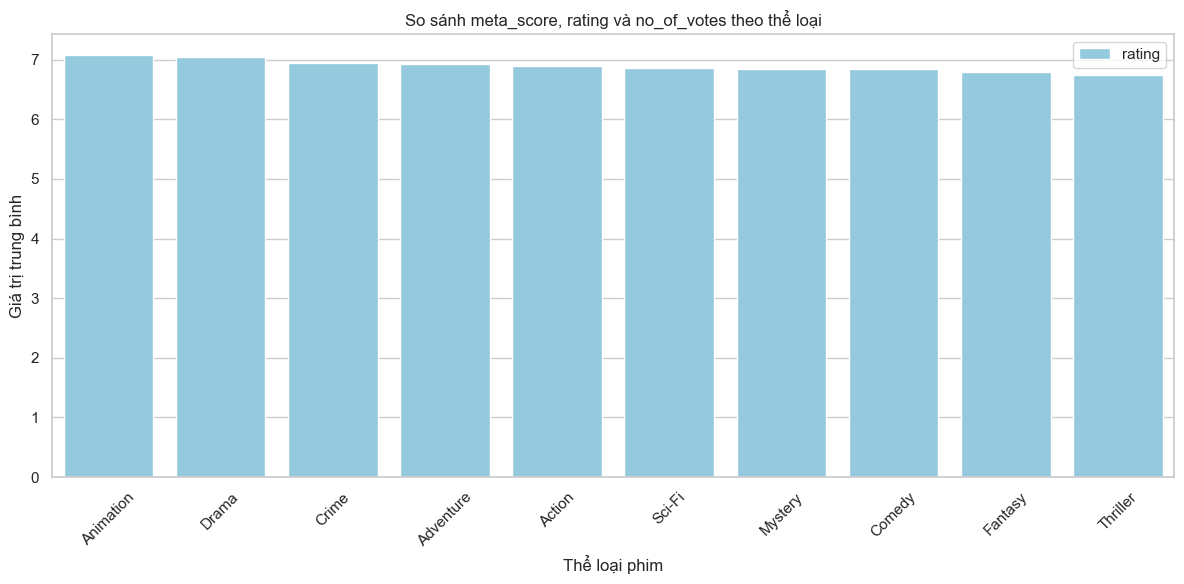

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("rating", ascending=False), x='Genre', y='rating', color='skyblue', label='rating')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

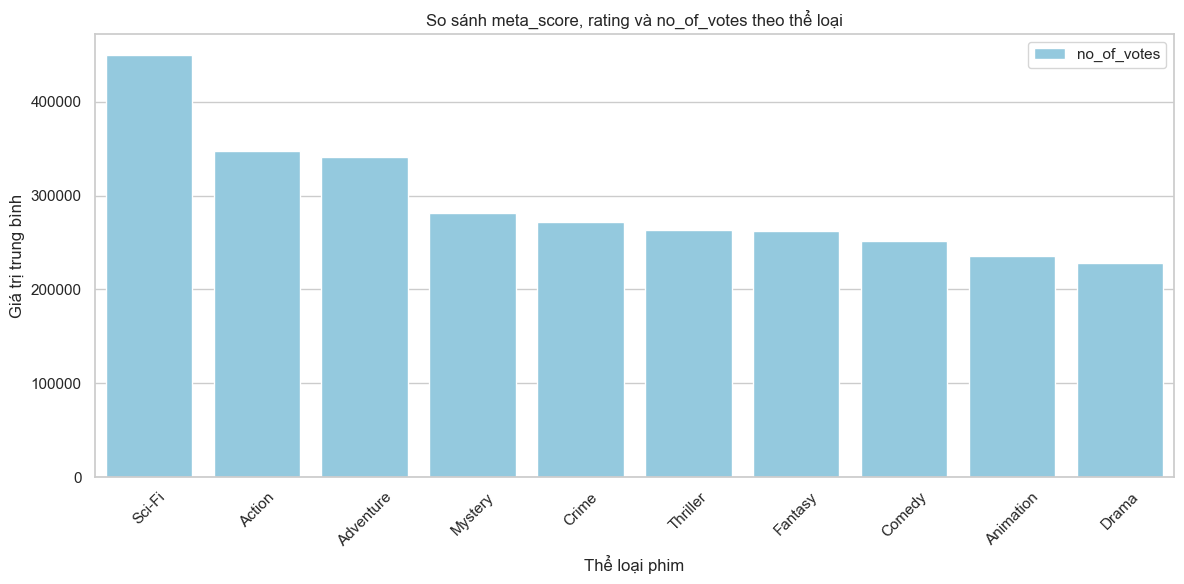

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("no_of_votes", ascending=False), x='Genre', y='no_of_votes', color='skyblue', label='no_of_votes')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

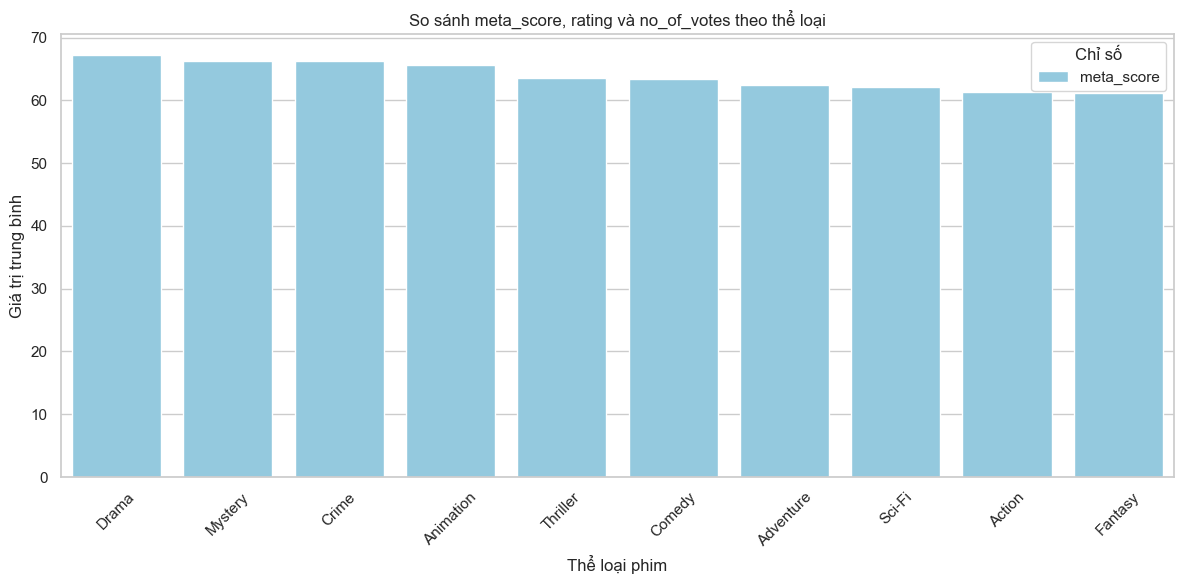

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_score_top_10_genres_df.sort_values("meta_score", ascending=False), x='Genre', y='meta_score', color='skyblue', label='meta_score')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend(title='Chỉ số')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = avg_score_top_10_genres_df.copy()

# Chọn các cột cần chuẩn hóa
cols_to_scale = ['meta_score', 'rating', 'no_of_votes']

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df_scaled)

       Genre  meta_score    rating  no_of_votes
0      Drama    1.000000  0.913086     0.000000
1     Comedy    0.373614  0.305738     0.107697
2     Action    0.020017  0.437689     0.538693
3  Adventure    0.204621  0.561252     0.512639
4   Thriller    0.413138  0.000000     0.160703
5    Fantasy    0.000000  0.163013     0.156684
6      Crime    0.843385  0.616206     0.198210
7    Mystery    0.860904  0.317413     0.242804
8  Animation    0.737043  1.000000     0.033330
9     Sci-Fi    0.158022  0.336049     1.000000


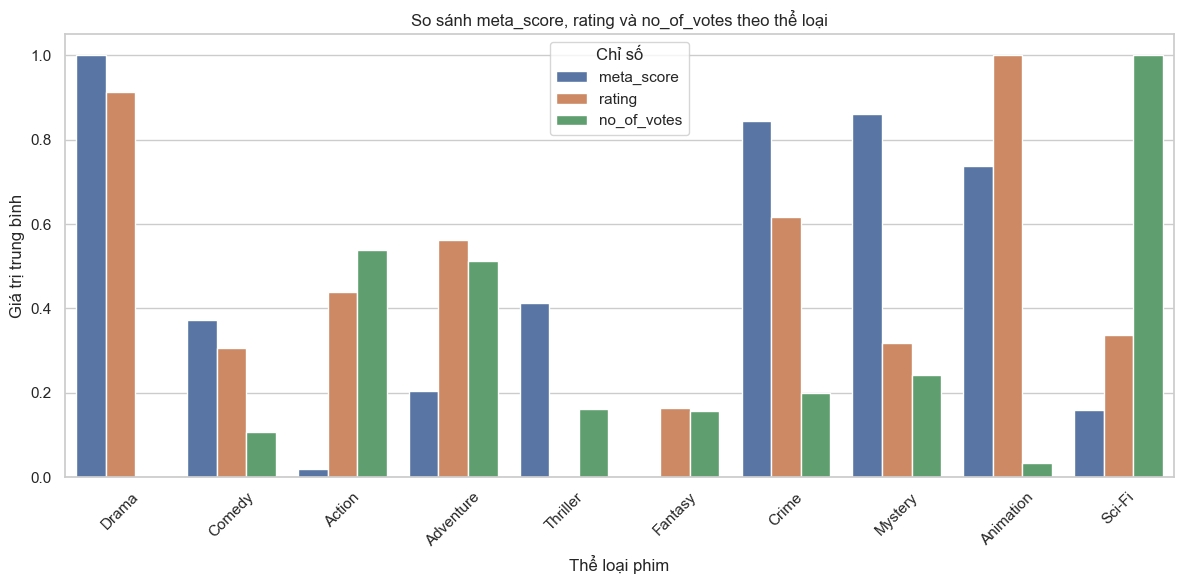

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử avg_score_top_10_genres_df đã sẵn sàng
df = df_scaled

# Chuyển DataFrame về dạng "long" để seaborn dễ dùng
df_melt = df.melt(id_vars='Genre', value_vars=['meta_score', 'rating', 'no_of_votes'],
                  var_name='Score Type', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Genre', y='Value', hue='Score Type')

plt.title('So sánh meta_score, rating và no_of_votes theo thể loại')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Thể loại phim')
plt.xticks(rotation=45)
plt.legend(title='Chỉ số')

plt.tight_layout()
plt.show()
